##Your client is a large MNC and they have 9 broad verticals across the organisation. One of the problem your client is facing is around identifying the right people for promotion (only for manager position and below) and prepare them in time. Currently the process, they are following is:

1.They first identify a set of employees based on recommendations/ past performance

2.Selected employees go through the separate training and evaluation program for each vertical. These programs are based on the required skill of each vertical

3.At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., employee gets promotion

For above mentioned process, the final promotions are only announced after the evaluation and this leads to delay in transition to their new roles. Hence, company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DF = pd.read_csv('traindf.csv')

In [3]:
DF

,employee_id,department,Department,region,education,Education,gender,Gender,recruitment_channel,Recruitment_Channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,Analytics,1,7,Bachelor's,2,m,1,sourcing,1,2,29,3,5,0,0,85,0
1,2,Finance,2,2,Master's & above,3,f,0,sourcing,1,1,35,1,2,0,0,63,0
2,3,Sales & Marketing,8,2,Bachelor's,2,m,1,other,3,1,25,3,2,0,0,53,0
3,4,Analytics,1,7,Master's & above,3,m,1,other,3,2,46,3,7,0,0,86,0
4,5,Operations,5,32,Bachelor's,2,m,1,other,3,1,31,3,7,0,0,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48655,48656,Operations,5,2,Master's & above,3,m,1,sourcing,1,1,59,2,16,1,0,57,1
48656,48657,Sales & Marketing,8,22,Bachelor's,2,m,1,sourcing,1,3,35,3,3,0,0,49,0
48657,48658,Procurement,6,2,Bachelor's,2,f,0,sourcing,1,1,28,5,5,1,0,70,0
48658,48659,Operations,5,13,Bachelor's,2,f,0,sourcing,1,1,34,5,7,1,0,56,0


In [4]:
DF.set_index('employee_id',inplace = True)

In [5]:
DF.shape

(48660, 17)

In [6]:
DF.isnull().sum()

department              0
Department              0
region                  0
education               0
Education               0
gender                  0
Gender                  0
recruitment_channel     0
Recruitment_Channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48660 entries, 1 to 48660
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   department            48660 non-null  object
 1   Department            48660 non-null  int64 
 2   region                48660 non-null  int64 
 3   education             48660 non-null  object
 4   Education             48660 non-null  int64 
 5   gender                48660 non-null  object
 6   Gender                48660 non-null  int64 
 7   recruitment_channel   48660 non-null  object
 8   Recruitment_Channel   48660 non-null  int64 
 9   no_of_trainings       48660 non-null  int64 
 10  age                   48660 non-null  int64 
 11  previous_year_rating  48660 non-null  int64 
 12  length_of_service     48660 non-null  int64 
 13  KPIs_met >80%         48660 non-null  int64 
 14  awards_won?           48660 non-null  int64 
 15  avg_training_score    48660 non-null

In [8]:
DF

,department,Department,region,education,Education,gender,Gender,recruitment_channel,Recruitment_Channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,,,,,
1,Analytics,1,7,Bachelor's,2,m,1,sourcing,1,2,29,3,5,0,0,85,0
2,Finance,2,2,Master's & above,3,f,0,sourcing,1,1,35,1,2,0,0,63,0
3,Sales & Marketing,8,2,Bachelor's,2,m,1,other,3,1,25,3,2,0,0,53,0
4,Analytics,1,7,Master's & above,3,m,1,other,3,2,46,3,7,0,0,86,0
5,Operations,5,32,Bachelor's,2,m,1,other,3,1,31,3,7,0,0,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48656,Operations,5,2,Master's & above,3,m,1,sourcing,1,1,59,2,16,1,0,57,1
48657,Sales & Marketing,8,22,Bachelor's,2,m,1,sourcing,1,3,35,3,3,0,0,49,0
48658,Procurement,6,2,Bachelor's,2,f,0,sourcing,1,1,28,5,5,1,0,70,0


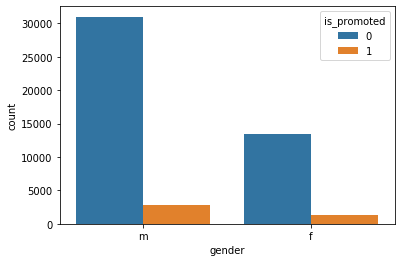

In [9]:
sns.countplot(x=DF.gender,hue=DF.is_promoted)

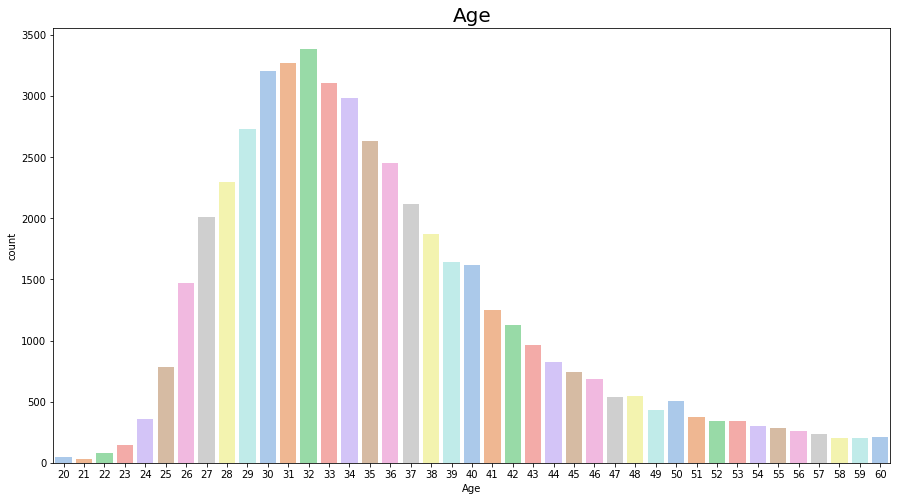

In [10]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8
p = sns.countplot(DF['age'], palette = 'pastel')
plt.title('Age', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('count')
plt.show()

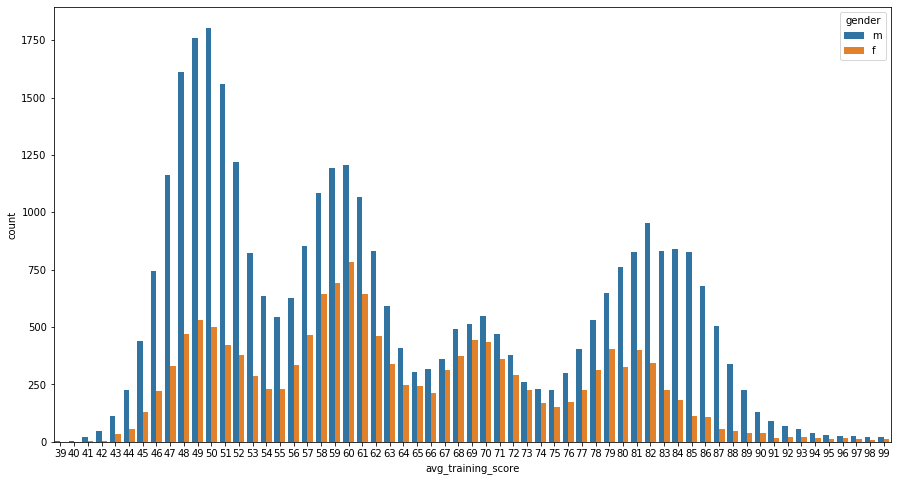

In [11]:
sns.countplot(x=DF.avg_training_score,hue=DF.gender)

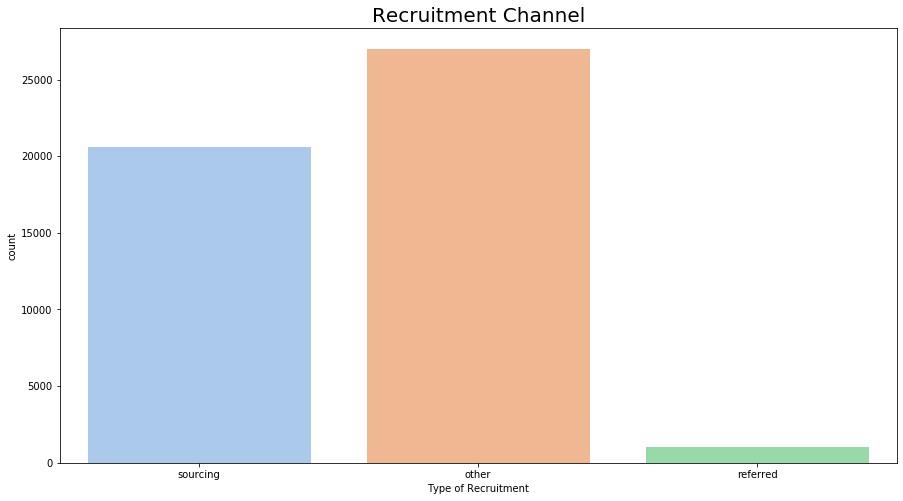

In [12]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8
p = sns.countplot(DF['recruitment_channel'], palette = 'pastel')
plt.title('Recruitment Channel', fontsize = 20)
plt.xlabel('Type of Recruitment')
plt.ylabel('count')
plt.show()

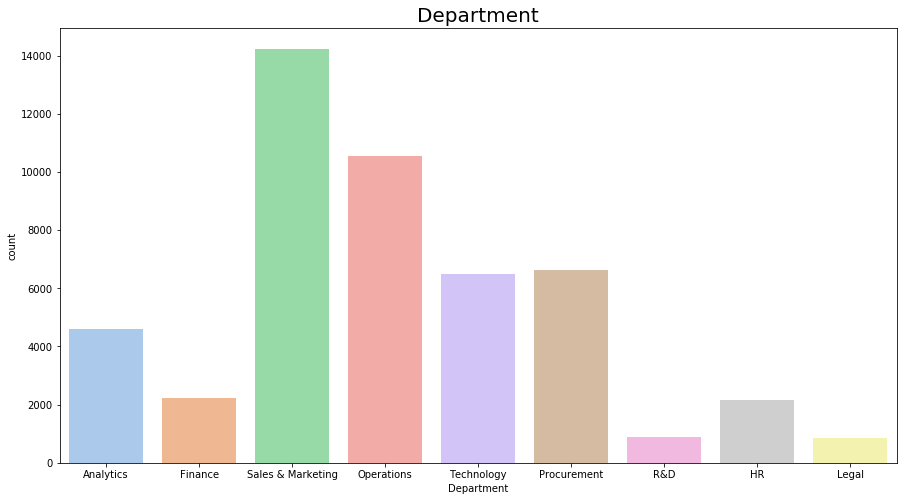

In [13]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,8
p = sns.countplot(DF['department'], palette = 'pastel')
plt.title('Department', fontsize = 20)
plt.xlabel('Department')
plt.ylabel('count')
plt.show()

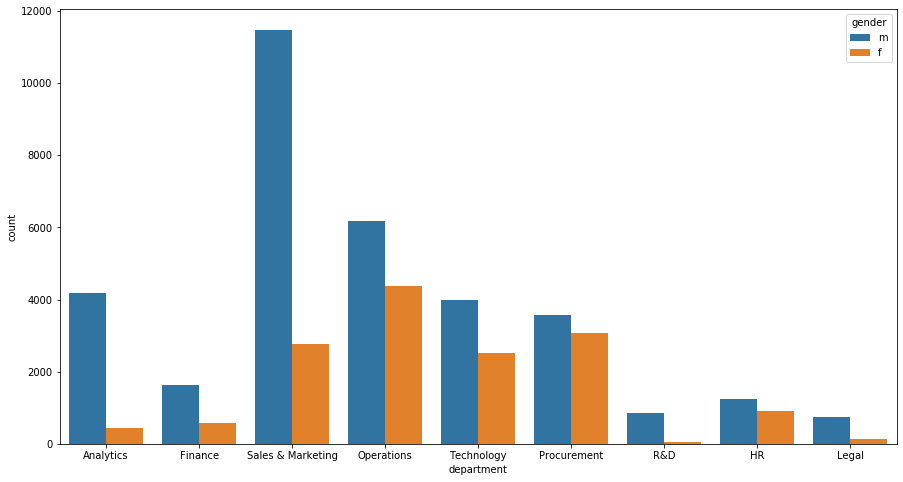

In [14]:
sns.countplot(x=DF.department,hue=DF.gender)

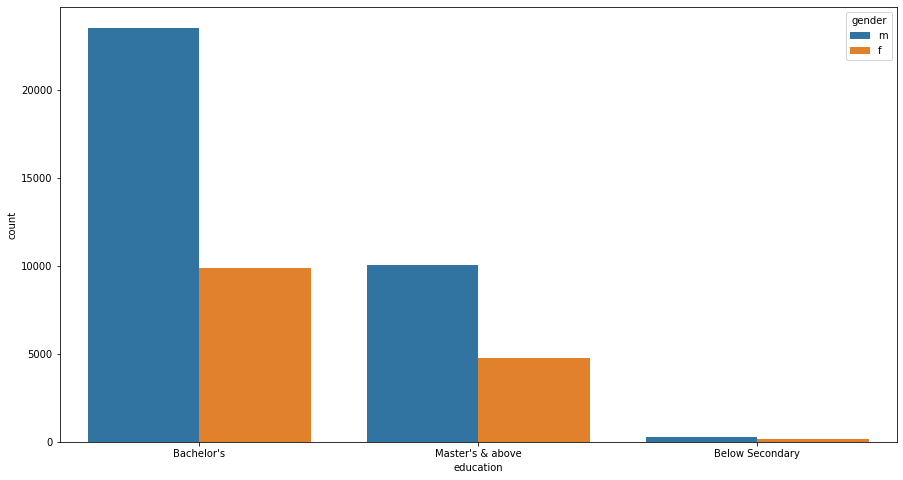

In [15]:
sns.countplot(x=DF.education,hue=DF.gender)

In [16]:
DF=  DF.drop(columns=['department'])

In [17]:
DF = DF.drop(columns=['education'])

In [18]:
DF= DF.drop(columns=['gender'])

In [19]:
DF= DF.drop(columns=['recruitment_channel'])

In [20]:
DF

,Department,region,Education,Gender,Recruitment_Channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
employee_id,,,,,,,,,,,,,
1,1,7,2,1,1,2,29,3,5,0,0,85,0
2,2,2,3,0,1,1,35,1,2,0,0,63,0
3,8,2,2,1,3,1,25,3,2,0,0,53,0
4,1,7,3,1,3,2,46,3,7,0,0,86,0
5,5,32,2,1,3,1,31,3,7,0,0,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48656,5,2,3,1,1,1,59,2,16,1,0,57,1
48657,8,22,2,1,1,3,35,3,3,0,0,49,0
48658,6,2,2,0,1,1,28,5,5,1,0,70,0


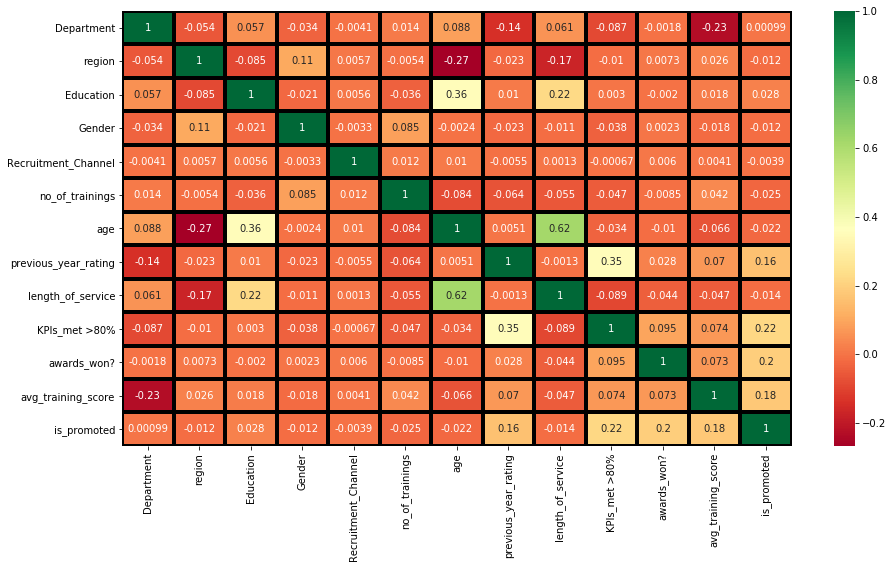

In [21]:
sns.heatmap(DF.corr(),annot=True,linewidths=3,linecolor="black",cmap="RdYlGn")

## Gender
## 0 is Female 
## 1 is Male

## Department
Analytics=1
Finance	=2
 HR     =3
Legal=4
Operations=5
Procurement=6
R&D=7
Sales & Marketing=8
Technology=9

## is promoted 
## 0 is no 
## 1 is yes 




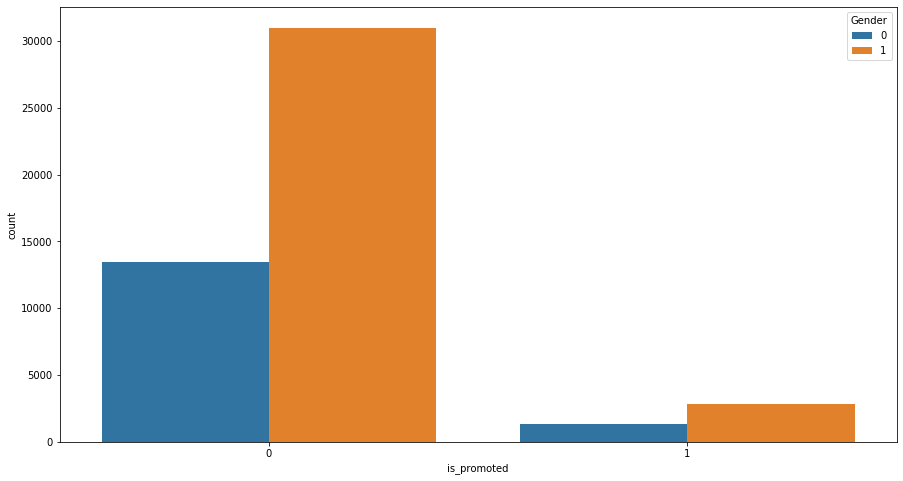

In [22]:
sns.countplot(x=DF.is_promoted,hue=DF.Gender)

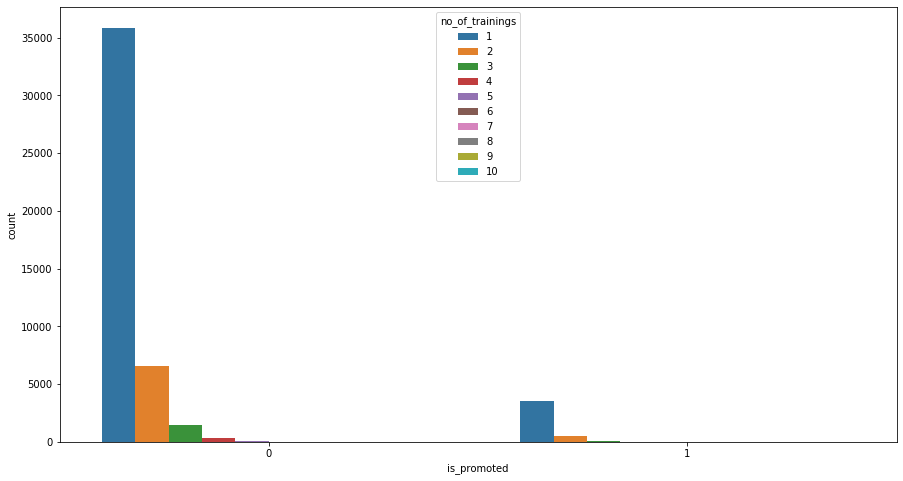

In [23]:
sns.countplot(x=DF.is_promoted,hue=DF.no_of_trainings)

In [24]:
DF= DF.drop(columns=['Recruitment_Channel'])

In [25]:
DF= DF.drop(columns=['Gender'])

In [26]:
DF= DF.drop(columns=['region'])

In [27]:
DF = DF.rename(columns={'awards_won?': 'Awards'})
DF = DF.rename(columns={'is_promoted':'Promotion'})

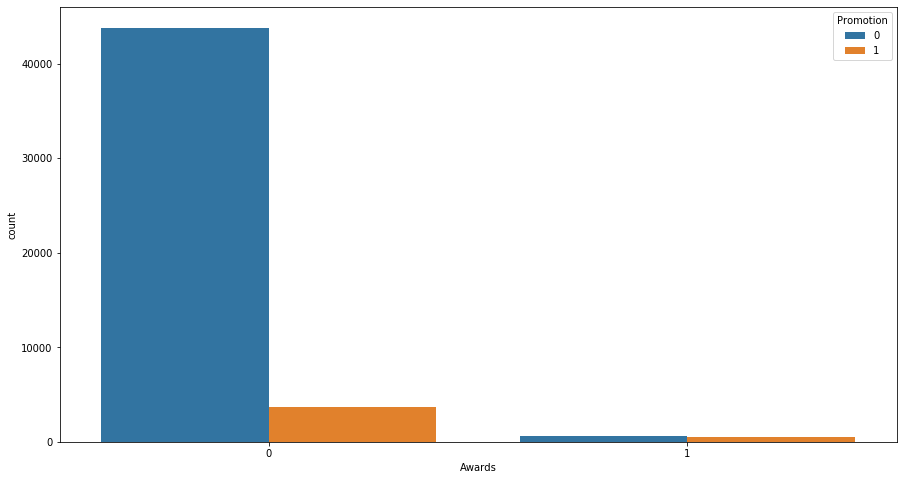

In [28]:
sns.countplot(x=DF.Awards,hue=DF.Promotion)

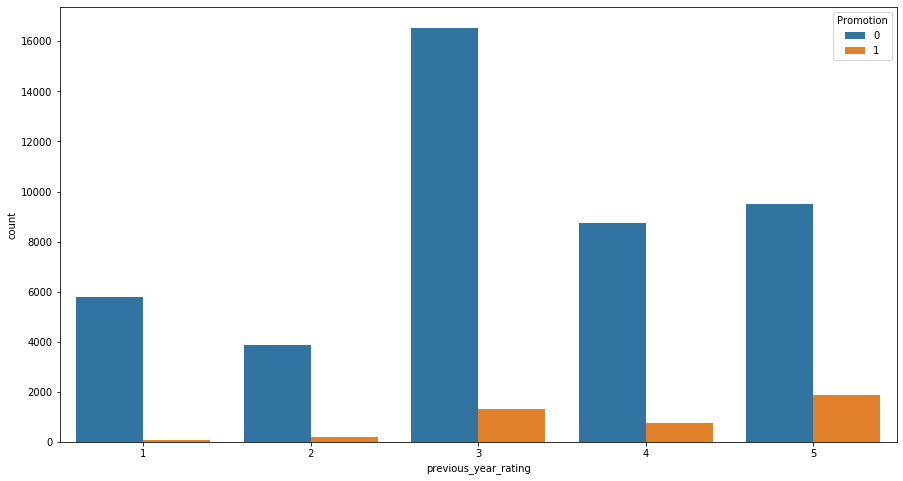

In [29]:
sns.countplot(x=DF.previous_year_rating,hue=DF.Promotion)

In [30]:
DF

,Department,Education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,Awards,avg_training_score,Promotion
employee_id,,,,,,,,,,
1,1,2,2,29,3,5,0,0,85,0
2,2,3,1,35,1,2,0,0,63,0
3,8,2,1,25,3,2,0,0,53,0
4,1,3,2,46,3,7,0,0,86,0
5,5,2,1,31,3,7,0,0,59,0
...,...,...,...,...,...,...,...,...,...,...
48656,5,3,1,59,2,16,1,0,57,1
48657,8,2,3,35,3,3,0,0,49,0
48658,6,2,1,28,5,5,1,0,70,0


In [31]:
DF= DF.drop(columns=['Department'])

In [32]:
DF

,Education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,Awards,avg_training_score,Promotion
employee_id,,,,,,,,,
1,2,2,29,3,5,0,0,85,0
2,3,1,35,1,2,0,0,63,0
3,2,1,25,3,2,0,0,53,0
4,3,2,46,3,7,0,0,86,0
5,2,1,31,3,7,0,0,59,0
...,...,...,...,...,...,...,...,...,...
48656,3,1,59,2,16,1,0,57,1
48657,2,3,35,3,3,0,0,49,0
48658,2,1,28,5,5,1,0,70,0


In [33]:
X = DF.loc[:,['Education','no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','Awards','avg_training_score']].values
y = DF.loc[:,['Promotion']].values

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [35]:
X

array([[-0.61897728,  1.23639949, -0.87456932, ..., -0.7442698 ,
        -0.15391006,  1.61200194],
       [ 1.4814017 , -0.41652647, -0.07823179, ..., -0.7442698 ,
        -0.15391006, -0.04545258],
       [-0.61897728, -0.41652647, -1.405461  , ..., -0.7442698 ,
        -0.15391006, -0.798841  ],
       ...,
       [-0.61897728, -0.41652647, -1.00729224, ...,  1.34359879,
        -0.15391006,  0.48191932],
       [-0.61897728, -0.41652647, -0.21095471, ...,  1.34359879,
        -0.15391006, -0.57282447],
       [ 1.4814017 , -0.41652647,  0.4526599 , ..., -0.7442698 ,
        -0.15391006,  0.25590279]])

In [36]:
y = y.reshape(-1)

In [37]:
y.shape

(48660,)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0, test_size = 0.25)

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [41]:
acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
#     print("For k = {}, accuracy = {}".format(i,acc))
    acc_list.append(acc)
    err_list.append(1-acc)

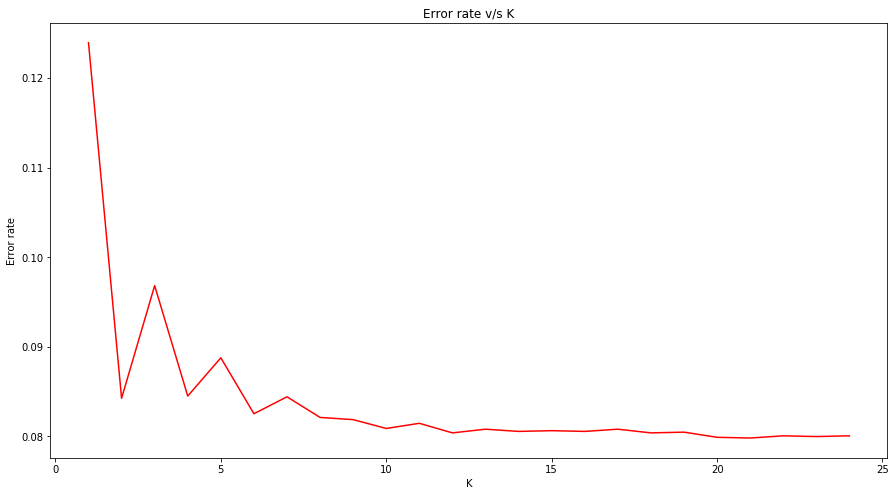

In [42]:
plt.plot(list(range(1,25)),err_list,c= 'r')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [57]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [58]:
confusion_matrix(y_test,y_pred)

array([[11073,    56],
       [  925,   111]], dtype=int64)

In [59]:
accuracy_score(y_test,y_pred)

0.9193588162762022